In [2]:
import os
import sys
import math
import time
import gzip
import random

import numpy as np
import pandas as pd
pd.set_option("display.max_columns",50)

import matplotlib.pyplot as plt
import seaborn as sns
PATH='~/Dropbox/cooperative/crystallinePolymer/data'

In [3]:
sample_list = pd.read_csv(os.path.join(PATH, 'SampleInfo.csv'), index_col=0, dtype={'CrystTemp': int, 'CrysTime': int, 'Cooling': bool})
sample_list['NucConc'] = sample_list['NucConc'].round(3)
enzyme = pd.read_csv(os.path.join(PATH, 'enzyme','test1.csv'), index_col=0)
sscurve = pd.read_csv(os.path.join(PATH, 'tensiletest','2','55d','summary.csv'))
sscurve['SampleNo']=sscurve.index+1
sscurve=sscurve.set_index('SampleNo')

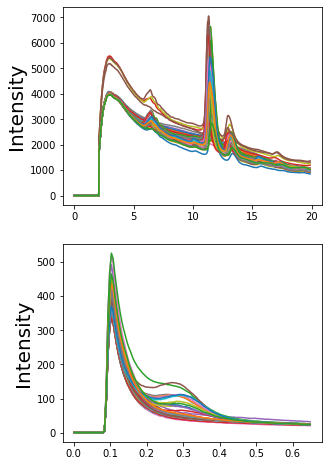

In [4]:
raw_waxd = pd.read_csv(PATH+"/corrected_data/waxd_rawdata.csv", index_col=0)
raw_saxs = pd.read_csv(PATH+"/corrected_data/saxs_rawdata.csv", index_col=0)

fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(5,8))
for id in range(18, 81):
    qw=raw_waxd[raw_waxd.SampleNo==id]
    axs[0].plot(qw["Q"], qw["Intensity"])
    qs=raw_saxs[raw_saxs.SampleNo==id]
    axs[1].plot(qs.Q, qs.Intensity)

for i in [0,1]:
    axs[i].set_ylabel('Intensity')
    axs[i].yaxis.label.set_size(20)

fig.subplots_adjust(left=0.18)
#plt.savefig("correct/raw_intensity.pdf")

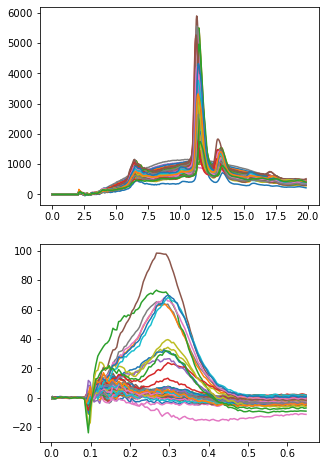

In [69]:
fig.subplots_adjust(left=0.1)

pcor_waxd = pd.read_csv(PATH+"/corrected_data/waxd_peakcorrect.csv", index_col=0)
pcor_saxs = pd.read_csv(PATH+"/corrected_data/saxs_peakcorrect.csv", index_col=0)
#print(pcor_waxd)
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(5,8))
for id in range(18, 81):
    qw=pcor_waxd[pcor_waxd.SampleNo==id]
    axs[0].plot(qw["Q"], qw["corrected_Intensity"])
    qs=pcor_saxs[pcor_saxs.SampleNo==id]
    axs[1].plot(qs.Q, qs.corrected_Intensity)

plt.savefig("correct/peakcorrect_intensity.pdf")

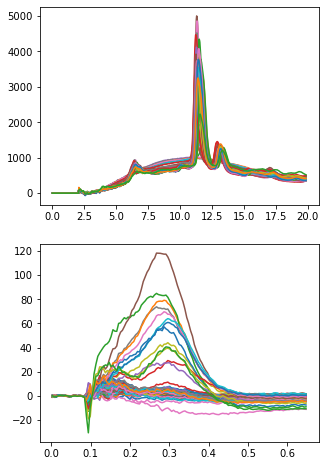

In [7]:
waxd = pd.read_csv(PATH+"/corrected_data/waxd_corrected.csv")
saxs = pd.read_csv(PATH+"/corrected_data/saxs_corrected.csv")
#print(waxd)
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(5,8))
for id in range(18, 81):
    qw=waxd[waxd.SampleNo==id]
    axs[0].plot(qw["Q"], qw["corrected_Intensity"])
    qs=saxs[saxs.SampleNo==id]
    axs[1].plot(qs.Q, qs.corrected_Intensity)

#plt.savefig("correct/corrected_intensity.pdf")

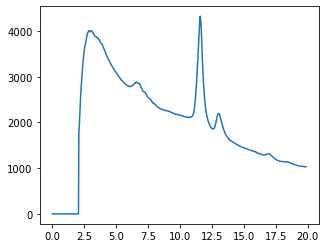

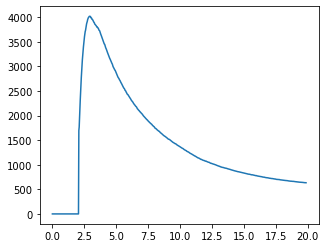

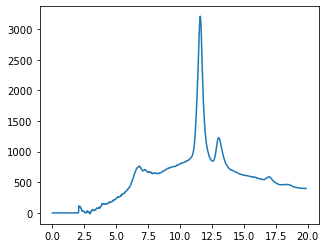

In [50]:
#補正方法の説明用
plt.figure(figsize=(5,4))
plt.plot(raw_waxd[raw_waxd.SampleNo==24].Q,raw_waxd[raw_waxd.SampleNo==24].Intensity)
plt.savefig("correct/20_raw.pdf")

plt.figure(figsize=(5,4))
air=pd.read_table(PATH+"/WAXD_rawdata/air.txt", sep=' ', skiprows=3).astype(float).iloc[:,[1,3]]\
        .rename(columns={'Unnamed: 1': 'Q', 'Unnamed: 3': 'airIntensity'})
plt.plot(air.Q,air.airIntensity)
plt.savefig("correct/air_raw.pdf")

plt.figure(figsize=(5,4))
plt.plot(pcor_waxd[pcor_waxd.SampleNo==24].Q,pcor_waxd[pcor_waxd.SampleNo==24].corrected_Intensity)
plt.savefig("correct/20_peakcorrect.pdf")

In [94]:
from decimal import Decimal, ROUND_HALF_UP
sample_info=pd.merge(sample_list.query('SampleNo>16 & SampleNo<81'),sscurve,
                      how='left',left_index=True,right_index=True)\
    .merge(enzyme,how="left", left_index=True, right_on="SampleNo")
#print(sample_info)

%precision 3
print("CrystTemp - Yield stress")
tempYs=sample_info["CrystTemp"].corr(sample_info["Yield stress/MPa"])
print(Decimal(str(tempYs)).quantize(Decimal('0.001'), ROUND_HALF_UP))
print("CrysTime - Yield stress")
timeYs=sample_info["CrysTime"].corr(sample_info["Yield stress/MPa"])
print(Decimal(str(timeYs)).quantize(Decimal('0.001'), ROUND_HALF_UP))
print("NucConcf - Yield stress")
nucYs=sample_info["NucConc"].corr(sample_info["Yield stress/MPa"])
print(Decimal(str(nucYs)).quantize(Decimal('0.001'), ROUND_HALF_UP))

CrystTemp - Yield stress
0.610
CrysTime - Yield stress
0.320
NucConcf - Yield stress
0.295


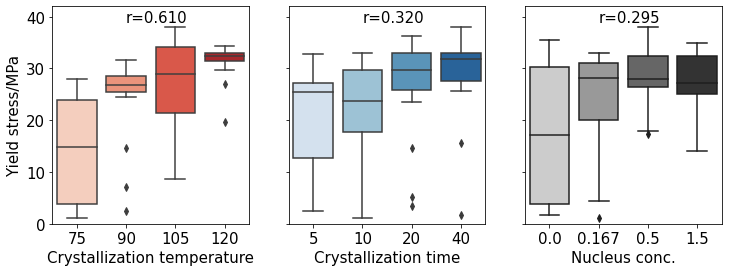

In [101]:
fig, axs =plt.subplots(nrows=1, ncols=3,figsize=(12, 4))
#結晶化温度 CrystTemp
sns.boxplot(x='CrystTemp', y='Yield stress/MPa', data=sample_info, ax=axs[0], palette="Reds")
#結晶化時間 CrysTime
sns.boxplot(x='CrysTime', y='Yield stress/MPa', data=sample_info, ax=axs[1], palette='Blues')
#核材の量 NucConc
sns.boxplot(x='NucConc', y='Yield stress/MPa', data=sample_info, ax=axs[2], palette='binary')

for col in [0,1,2] : 
    axs[col].set_ylim(0, 42)
    axs[col].xaxis.label.set_size(fontsize=15)
    axs[col].yaxis.label.set_size(fontsize=15)
    axs[col].tick_params(labelsize=15)

axs[0].set_xlabel('Crystallization temperature')
axs[1].set_xlabel('Crystallization time')
axs[2].set_xlabel('Nucleus conc.')


for col in [1,2] :
    axs[col].yaxis.set_ticklabels([])
    axs[col].set_ylabel('')

axs[0].text(1,39, "r="+str(Decimal(str(tempYs)).quantize(Decimal('0.001'), ROUND_HALF_UP)), fontsize=15)
axs[1].text(1,39, "r="+str(Decimal(str(timeYs)).quantize(Decimal('0.001'), ROUND_HALF_UP)), fontsize=15)
axs[2].text(1,39, "r="+str(Decimal(str(nucYs)).quantize(Decimal('0.001'), ROUND_HALF_UP)), fontsize=15)

plt.savefig("correct/ss_boxplot.pdf")

In [102]:
print("CrystTemp - Enzyme")
tempEnz=sample_info["CrystTemp"].corr(sample_info["day6"])
print(Decimal(str(tempEnz)).quantize(Decimal('0.001'), ROUND_HALF_UP))
print("CrysTime - Enzyme")
timeEnz=sample_info["CrysTime"].corr(sample_info["day6"])
print(Decimal(str(timeEnz)).quantize(Decimal('0.001'), ROUND_HALF_UP))
print("NucConcf - Enzyme")
nucEnz=sample_info["NucConc"].corr(sample_info["day6"])
print(Decimal(str(nucEnz)).quantize(Decimal('0.001'), ROUND_HALF_UP))

CrystTemp - Enzyme
-0.830
CrysTime - Enzyme
-0.175
NucConcf - Enzyme
-0.015


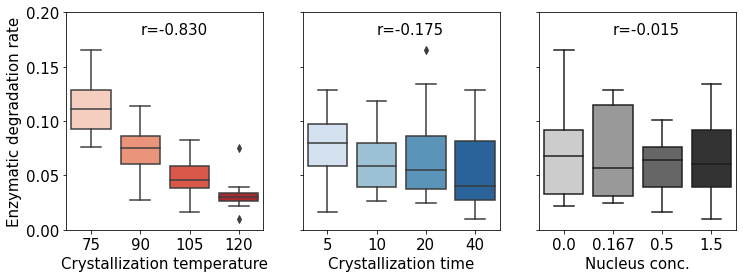

In [105]:
fig, axs =plt.subplots(nrows=1, ncols=3,figsize=(12, 4))
#結晶化温度 CrystTemp
sns.boxplot(x='CrystTemp', y='day6', data=sample_info, ax=axs[0], palette="Reds")
#結晶化時間 CrysTime
sns.boxplot(x='CrysTime', y='day6', data=sample_info, ax=axs[1], palette='Blues')
#核材の量 NucConc
sns.boxplot(x='NucConc', y='day6', data=sample_info, ax=axs[2], palette='binary')


axs[0].set_ylabel('Enzymatic degradation rate')
for col in [0,1,2] : 
    axs[col].set_ylim(0, 0.2)
    axs[col].xaxis.label.set_size(fontsize=15)
    axs[col].yaxis.label.set_size(fontsize=15)
    axs[col].tick_params(labelsize=15)

axs[0].set_xlabel('Crystallization temperature')
axs[1].set_xlabel('Crystallization time')
axs[2].set_xlabel('Nucleus conc.')


for col in [1,2] :
    axs[col].yaxis.set_ticklabels([])
    axs[col].set_ylabel('')

axs[0].text(1,0.18, "r="+str(Decimal(str(tempEnz)).quantize(Decimal('0.001'), ROUND_HALF_UP)), fontsize=15)
axs[1].text(1,0.18, "r="+str(Decimal(str(timeEnz)).quantize(Decimal('0.001'), ROUND_HALF_UP)), fontsize=15)
axs[2].text(1,0.18, "r="+str(Decimal(str(nucEnz)).quantize(Decimal('0.001'), ROUND_HALF_UP)), fontsize=15)

plt.savefig("correct/enzyme_boxplot.pdf")

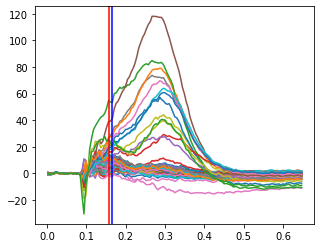

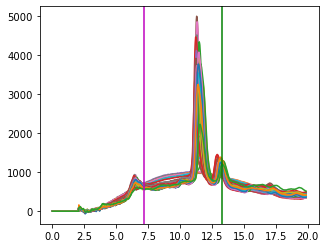

In [106]:
fig, ax = plt.subplots(figsize=(5,4))
for id in range(18, 81):
    qs=saxs[saxs.SampleNo==id]
    ax.plot(qs.Q, qs.corrected_Intensity)

ax.axvline(x=0.1564557,color="r")
ax.axvline(x=0.16608374,color="b")
plt.savefig("correct/enz_importants.pdf")

fig, ax = plt.subplots(figsize=(5,4))
for id in range(18, 81):
    qw=waxd[waxd.SampleNo==id]
    ax.plot(qw["Q"], qw["corrected_Intensity"])

ax.axvline(x=13.265596,color="g")
ax.axvline(x=7.1642504,color="m")
plt.savefig("correct/ss_importantw.pdf")




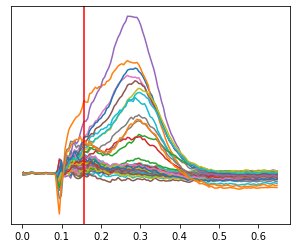

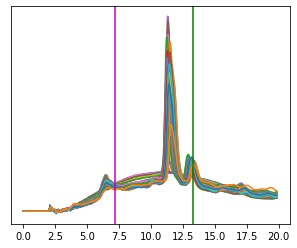

In [8]:
##  SAXSが極端に負になっているSampleNo 24を除去したら？
fig, ax = plt.subplots(figsize=(5,4))
for id in range(18, 81):
    if id ==24:
        continue
    qs=saxs[saxs.SampleNo==id]
    ax.plot(qs.Q, qs.corrected_Intensity)

ax.axvline(x=0.1564557,color="r")
#ax.axvline(x=0.16608374,color="b")
ax.set_yticks([])
plt.savefig("correct/enz_importants_ex.pdf")

fig, ax = plt.subplots(figsize=(5,4))
for id in range(18, 81):
    if id ==24:
        continue
    qw=waxd[waxd.SampleNo==id]
    ax.plot(qw["Q"], qw["corrected_Intensity"])

ax.axvline(x=13.265596,color="g")
ax.axvline(x=7.1642504,color="m")
ax.set_yticks([])
plt.savefig("correct/ss_importantw_ex.pdf")
